## Задача 1

Реализовать класс для работы с линейной регрессией

In [20]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import time
# from simpletransformers.language_representation import RepresentationModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from  collections import Counter
import ast

import seaborn as sns
from matplotlib import pyplot as plt



In [21]:
train_data = pd.read_csv('/content/train_contest.csv')
test_data = pd.read_csv('/content/for_prediction.csv')



In [ ]:
#обрабатываю тип вакансии
# train_data['type'] = train_data['type'].apply(lambda x: ast.literal_eval(x)['name'])
# test_data['type'] = test_data['type'].apply(lambda x: ast.literal_eval(x)['name'])
# train_data = pd.get_dummies(train_data, columns=['type'])

In [ ]:
# train_data['street'] = train_data['address'].apply(lambda x: ast.literal_eval(x)['street'] if isinstance(x, str) else 'Информации нет')

In [ ]:
# train_data['published_at'] = pd.to_datetime(train_data['published_at'])
# test_data['published_at'] = pd.to_datetime(test_data['published_at'])

In [11]:
# train_data['year'] = train_data['published_at'].dt.year
# train_data['month'] = train_data['published_at'].dt.month
# train_data['day_of_week'] = train_data['published_at'].dt.weekday
#
# test_data['year'] = test_data['published_at'].dt.year
# test_data['month'] = test_data['published_at'].dt.month
# test_data['day_of_week'] = test_data['published_at'].dt.weekday


In [22]:
train_data['name']

,name
0,Агент по недвижимости
1,IT-специалист/ техник
2,Старший/ведущий инженер-программист
3,Эксперт / методист приемной комиссии
4,Табельщица/табельщик
...,...
30067,Руководитель отдела персонала
30068,Специалист по развитию и обучению персонала
30069,Инженер-программист
30070,Куратор проекта


In [23]:
train_data_dropped = train_data.drop(['response_url', 'sort_point_distance', 'insider_interview',
                 'contacts', 'immediate_redirect_url','department', 'address', 'url', 'alternate_url'], axis=1)
train_data_dropped.__contains__('[]')

False

In [24]:
train_data_dropped.replace('[]', np.nan, inplace=True)
train_data_dropped.dropna(inplace=True, axis=1)
train_data_dropped.drop(['published_at', 'created_at'], axis=1, inplace= True)

<ipython-input-24-e1a3743e0435>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_dropped.replace('[]', np.nan, inplace=True)


In [25]:
# проведём группировку объектов по зарплате

train_data_dropped = train_data_dropped.sort_values(by='mean_salary')
quartiles = train_data_dropped['mean_salary'].quantile([0, 0.25, 0.50, 0.75, 1])

# Определяем границы диапазонов
bins = quartiles.values
labels = [1, 2, 3, 4]

# Применяем группировку
train_data_dropped['salary_range'] = pd.cut(train_data_dropped['mean_salary'], bins=bins, labels=labels)

# Считаем количество сотрудников в каждой группе
grouped_df = train_data_dropped.groupby(['salary_range']).size().reset_index(name='employee_count')

train_data_dropped.dropna(axis=0, inplace=True)
# Показываем результат
print(grouped_df)
train_data_dropped

<ipython-input-25-4107ebf129d1>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = train_data_dropped.groupby(['salary_range']).size().reset_index(name='employee_count')


  salary_range  employee_count
0            1            7852
1            2            8179
2            3            6870
3            4            7161


,premium,name,has_test,response_letter_required,area,type,archived,employer,snippet,schedule,accept_temporary,description,experience,specializations,region,mean_salary,salary_range
15361,False,Аналитик,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '5289620', 'name': 'УНК России по г. Мо...",{'requirement': 'Опыт работы от 1 года. Владен...,"{'id': 'fullDay', 'name': 'Полный день'}",False,"<strong>Обязанности:</strong> <ul> <li>сбор, о...","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'id': '17.751', 'name': 'Другое', 'profarea_...",Москва,35.0,1
25330,False,Менеджер по подбору персонала,False,False,"{'id': '11', 'name': 'Барнаул', 'url': 'https:...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '2013627', 'name': 'Сеть офисов недвижи...",{'requirement': 'Желателен позитивный опыт под...,"{'id': 'fullDay', 'name': 'Полный день'}",False,<strong>Обязанности:</strong> <ul> <li>Телефон...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Алтайский край,35.0,1
1952,False,Эксперт,False,False,"{'id': '47', 'name': 'Кемерово', 'url': 'https...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '4273740', 'name': 'ГУ МВД России по Ке...",{'requirement': 'Высшее образование в области ...,"{'id': 'fullDay', 'name': 'Полный день'}",False,<strong>Обязанности: </strong>Производство ком...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.270', 'name': 'Сетевые технологии',...",Кемеровская область,37.5,1
18977,False,Помощник аналитика,False,False,"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '8637323', 'name': 'Нова', 'url': 'http...",{'requirement': 'Желание работать и зарабатыва...,"{'id': 'remote', 'name': 'Удаленная работа'}",True,<strong>Обязанности:</strong> <ul> <li>Работа ...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.751', 'name': 'Другое', 'profarea_...",Краснодарский край,45.0,1
19189,False,Менеджер по подбору персонала,False,False,"{'id': '131', 'name': 'Симферополь', 'url': 'h...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '8898802', 'name': 'Акопян', 'url': 'ht...",{'requirement': 'Необходимые качества: стрессо...,"{'id': 'fullDay', 'name': 'Полный день'}",False,<strong>Обязанности:</strong> <p>подбор и адап...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Республика Крым,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,False,"Брокер по продаже недвижимости элит-класса в ""...",False,False,"{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1065039', 'name': 'ОНИКС-Недвижимость'...","{'requirement': None, 'responsibility': None}","{'id': 'fullDay', 'name': 'Полный день'}",False,<p>Компания &quot;ОНИКС&quot;- это крупнейшее ...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.242', 'name': 'Прямые продажи', 'p...",Краснодарский край,2500000.0,4
7718,False,Менеджер по продаже недвижимости элит-класса в...,False,False,"{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1065039', 'name': 'ОНИКС-Недвижимость'...","{'requirement': None, 'responsibility': None}","{'id': 'fullDay', 'name': 'Полный день'}",False,<p>Компания &quot;ОНИКС&quot;- это крупнейшее ...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.242', 'name': 'Прямые продажи', 'p...",Краснодарский край,2500000.0,4
15025,False,Специалист по инвестированию,False,False,"{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '4434860', 'name': 'Группа компаний САТ...",{'requirement': 'Опрятный внешний вид. Легкая ...,"{'id': 'fullDay', 'name': 'Полный день'}",False,"<p><strong>*В программу поддержки сотрудников,...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.242', 'name': 'Прямые прода

In [26]:
# Домножим выбросы по зарплате на 1000
filtred_train_data_dropped = train_data_dropped[train_data_dropped['mean_salary'] >= 1000]
filtred_train_data_dropped

,premium,name,has_test,response_letter_required,area,type,archived,employer,snippet,schedule,accept_temporary,description,experience,specializations,region,mean_salary,salary_range
10653,False,Web-программист,False,False,"{'id': '49', 'name': 'Киров (Кировская область...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '5829565', 'name': 'АНО ДПО АКАДЕМИЯ ША...","{'requirement': 'Ответственность, пунктуальнос...","{'id': 'fullDay', 'name': 'Полный день'}",True,<p><strong>Обязанности:</strong></p> <p>Обучен...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'id': '1.221', 'name': 'Программирование, Ра...",Кировская область,1500.0,1
15978,False,Руководитель отдела по работе с персоналом (HR),False,False,"{'id': '107', 'name': 'Чебоксары', 'url': 'htt...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1948319', 'name': 'Рише', 'url': 'http...",{'requirement': 'Навыки. - Тонко чувствующий с...,"{'id': 'fullDay', 'name': 'Полный день'}",False,"<p>К сожалению, в мире есть устойчивое разночт...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'id': '9.738', 'name': 'Другое', 'profarea_i...",Чувашская Республика,1500.0,1
28219,False,Интерн-разработчик Delphi,False,False,"{'id': '66', 'name': 'Нижний Новгород', 'url':...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '17266', 'name': 'Теком', 'url': 'https...",{'requirement': 'Базовые знания языков Delphi....,"{'id': 'flexible', 'name': 'Гибкий график'}",False,<p><strong>Специфика:</strong></p> <ul> <li>Ра...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.221', 'name': 'Программирование, Ра...",Нижегородская область,4000.0,1
18345,False,Младший системный администратор (с. Каратузское),False,False,"{'id': '4756', 'name': 'Каратузское', 'url': '...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '136475', 'name': 'Командор, сеть супер...",{'requirement': 'Среднее-специальное. Опыт раб...,"{'id': 'flexible', 'name': 'Гибкий график'}",False,<p><strong>Обязанности:</strong></p> <ul> <li>...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'id': '1.270', 'name': 'Сетевые технологии',...",Красноярский край,7000.0,1
1070,False,Инспектор отдела кадров,False,False,"{'id': '54', 'name': 'Красноярск', 'url': 'htt...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '3601890', 'name': 'ПКФ Кангин-Ко', 'ur...",{'requirement': 'Профессиональная подготовка. ...,"{'id': 'flexible', 'name': 'Гибкий график'}",True,<strong>Обязанности:</strong> <ul> <li>ведение...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Красноярский край,7500.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,False,"Брокер по продаже недвижимости элит-класса в ""...",False,False,"{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1065039', 'name': 'ОНИКС-Недвижимость'...","{'requirement': None, 'responsibility': None}","{'id': 'fullDay', 'name': 'Полный день'}",False,<p>Компания &quot;ОНИКС&quot;- это крупнейшее ...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.242', 'name': 'Прямые продажи', 'p...",Краснодарский край,2500000.0,4
7718,False,Менеджер по продаже недвижимости элит-класса в...,False,False,"{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1065039', 'name': 'ОНИКС-Недвижимость'...","{'requirement': None, 'responsibility': None}","{'id': 'fullDay', 'name': 'Полный день'}",False,<p>Компания &quot;ОНИКС&quot;- это крупнейшее ...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.242', 'name': 'Прямые продажи', 'p...",Краснодарский край,2500000.0,4
15025,False,Специалист по инвестированию,False,False,"{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '4434860', 'name': 'Группа компаний САТ...",{'requirement': 'Опрятный внешний вид. Легкая ...,"{'id': 'fullDay', 'name': 'Полный день'}",False,"<p><strong>*В программу по

In [27]:
categorical = train_data_dropped.select_dtypes(include=['object']).columns
df_data_dropped_categorial = train_data_dropped.loc[:, categorical]
df_data_dropped_categorial

,name,area,type,employer,snippet,schedule,description,experience,specializations,region
15361,Аналитик,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'id': '5289620', 'name': 'УНК России по г. Мо...",{'requirement': 'Опыт работы от 1 года. Владен...,"{'id': 'fullDay', 'name': 'Полный день'}","<strong>Обязанности:</strong> <ul> <li>сбор, о...","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'id': '17.751', 'name': 'Другое', 'profarea_...",Москва
25330,Менеджер по подбору персонала,"{'id': '11', 'name': 'Барнаул', 'url': 'https:...","{'id': 'open', 'name': 'Открытая'}","{'id': '2013627', 'name': 'Сеть офисов недвижи...",{'requirement': 'Желателен позитивный опыт под...,"{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Телефон...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Алтайский край
1952,Эксперт,"{'id': '47', 'name': 'Кемерово', 'url': 'https...","{'id': 'open', 'name': 'Открытая'}","{'id': '4273740', 'name': 'ГУ МВД России по Ке...",{'requirement': 'Высшее образование в области ...,"{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности: </strong>Производство ком...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.270', 'name': 'Сетевые технологии',...",Кемеровская область
18977,Помощник аналитика,"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'id': 'open', 'name': 'Открытая'}","{'id': '8637323', 'name': 'Нова', 'url': 'http...",{'requirement': 'Желание работать и зарабатыва...,"{'id': 'remote', 'name': 'Удаленная работа'}",<strong>Обязанности:</strong> <ul> <li>Работа ...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.751', 'name': 'Другое', 'profarea_...",Краснодарский край
19189,Менеджер по подбору персонала,"{'id': '131', 'name': 'Симферополь', 'url': 'h...","{'id': 'open', 'name': 'Открытая'}","{'id': '8898802', 'name': 'Акопян', 'url': 'ht...",{'requirement': 'Необходимые качества: стрессо...,"{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <p>подбор и адап...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'id': '6.254', 'name': 'Рекрутмент', 'profar...",Республика Крым
...,...,...,...,...,...,...,...,...,...,...
21398,"Брокер по продаже недвижимости элит-класса в ""...","{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'id': '1065039', 'name': 'ОНИКС-Недвижимость'...","{'requirement': None, 'responsibility': None}","{'id': 'fullDay', 'name': 'Полный день'}",<p>Компания &quot;ОНИКС&quot;- это крупнейшее ...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.242', 'name': 'Прямые продажи', 'p...",Краснодарский край
7718,Менеджер по продаже недвижимости элит-класса в...,"{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'id': '1065039', 'name': 'ОНИКС-Недвижимость'...","{'requirement': None, 'responsibility': None}","{'id': 'fullDay', 'name': 'Полный день'}",<p>Компания &quot;ОНИКС&quot;- это крупнейшее ...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.242', 'name': 'Прямые продажи', 'p...",Краснодарский край
15025,Специалист по инвестированию,"{'id': '237', 'name': 'Сочи', 'url': 'https://...","{'id': 'open', 'name': 'Открытая'}","{'id': '4434860', 'name': 'Группа компаний САТ...",{'requirement': 'Опрятный внешний вид. Легкая ...,"{'id': 'fullDay', 'name': 'Полный день'}","<p><strong>*В программу поддержки сотрудников,...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '17.242', 'name': 'Прямые продажи', 'p...",Краснодарский край
8025,Эксперт по элитной недвижимости в Красной Поляне,"{'id': '2805', 'name': 'Красная Поляна', 'url'...","{'id': 'open', 'name': 'Открытая'}","{'id': '893093', 'name': 'АСКА недвижимость', ...",{'requirement': 'Опыт работы: в продажах онлай...,"{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Сопрово...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",

In [28]:
# выведем данные для каждого сегмента
segment_1 = filtred_train_data_dropped[filtred_train_data_dropped['salary_range'] == 1]
segment_2 = filtred_train_data_dropped[filtred_train_data_dropped['salary_range'] == 2]
segment_3 = filtred_train_data_dropped[filtred_train_data_dropped['salary_range'] == 3]
segment_4 = filtred_train_data_dropped[filtred_train_data_dropped['salary_range'] == 4]

In [29]:
df_data_dropped_categorial['snippet'] = df_data_dropped_categorial['snippet'].str.replace("'", '"')
df_data_dropped_categorial['snippet'] = df_data_dropped_categorial['snippet'].apply(lambda x: x.split(':')[1])

In [30]:
import re
from collections import Counter
# Функция для очистки текста от лишних символов и приведения к нижнему регистру
def must_popular_words(texts) -> pd.DataFrame:
	def clean_text(text):
		text = re.sub(r'[^\w\s]', '', text).lower()  # Удаляем все символы, кроме букв и пробелов
		return text.strip()

	cleaned_texts = [clean_text(t) for t in texts]
	all_words = []
	for text in cleaned_texts:
		words = text.split()
		all_words.extend(words)

	word_counts = Counter(all_words)

	# Выводим топ-10 самых частых слов
	top_n = 35
	counters = []
	labels = []
	most_frequent_words = word_counts.most_common(top_n)
	for word, count in most_frequent_words:
		if len(word) > 3:
			counters.append(count)
			labels.append(word)

	return pd.DataFrame({'word': labels, 'count': counters})

words_data_1 = must_popular_words(segment_1['snippet'])
words_data_2 = must_popular_words(segment_2['snippet'])
words_data_3 = must_popular_words(segment_3['snippet'])
words_data_4 = must_popular_words(segment_4['snippet'])

<ipython-input-31-42cd75030658>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
<ipython-input-31-42cd75030658>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
<ipython-input-31-42cd75030658>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
<ipython-input-31-42cd75030658>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")


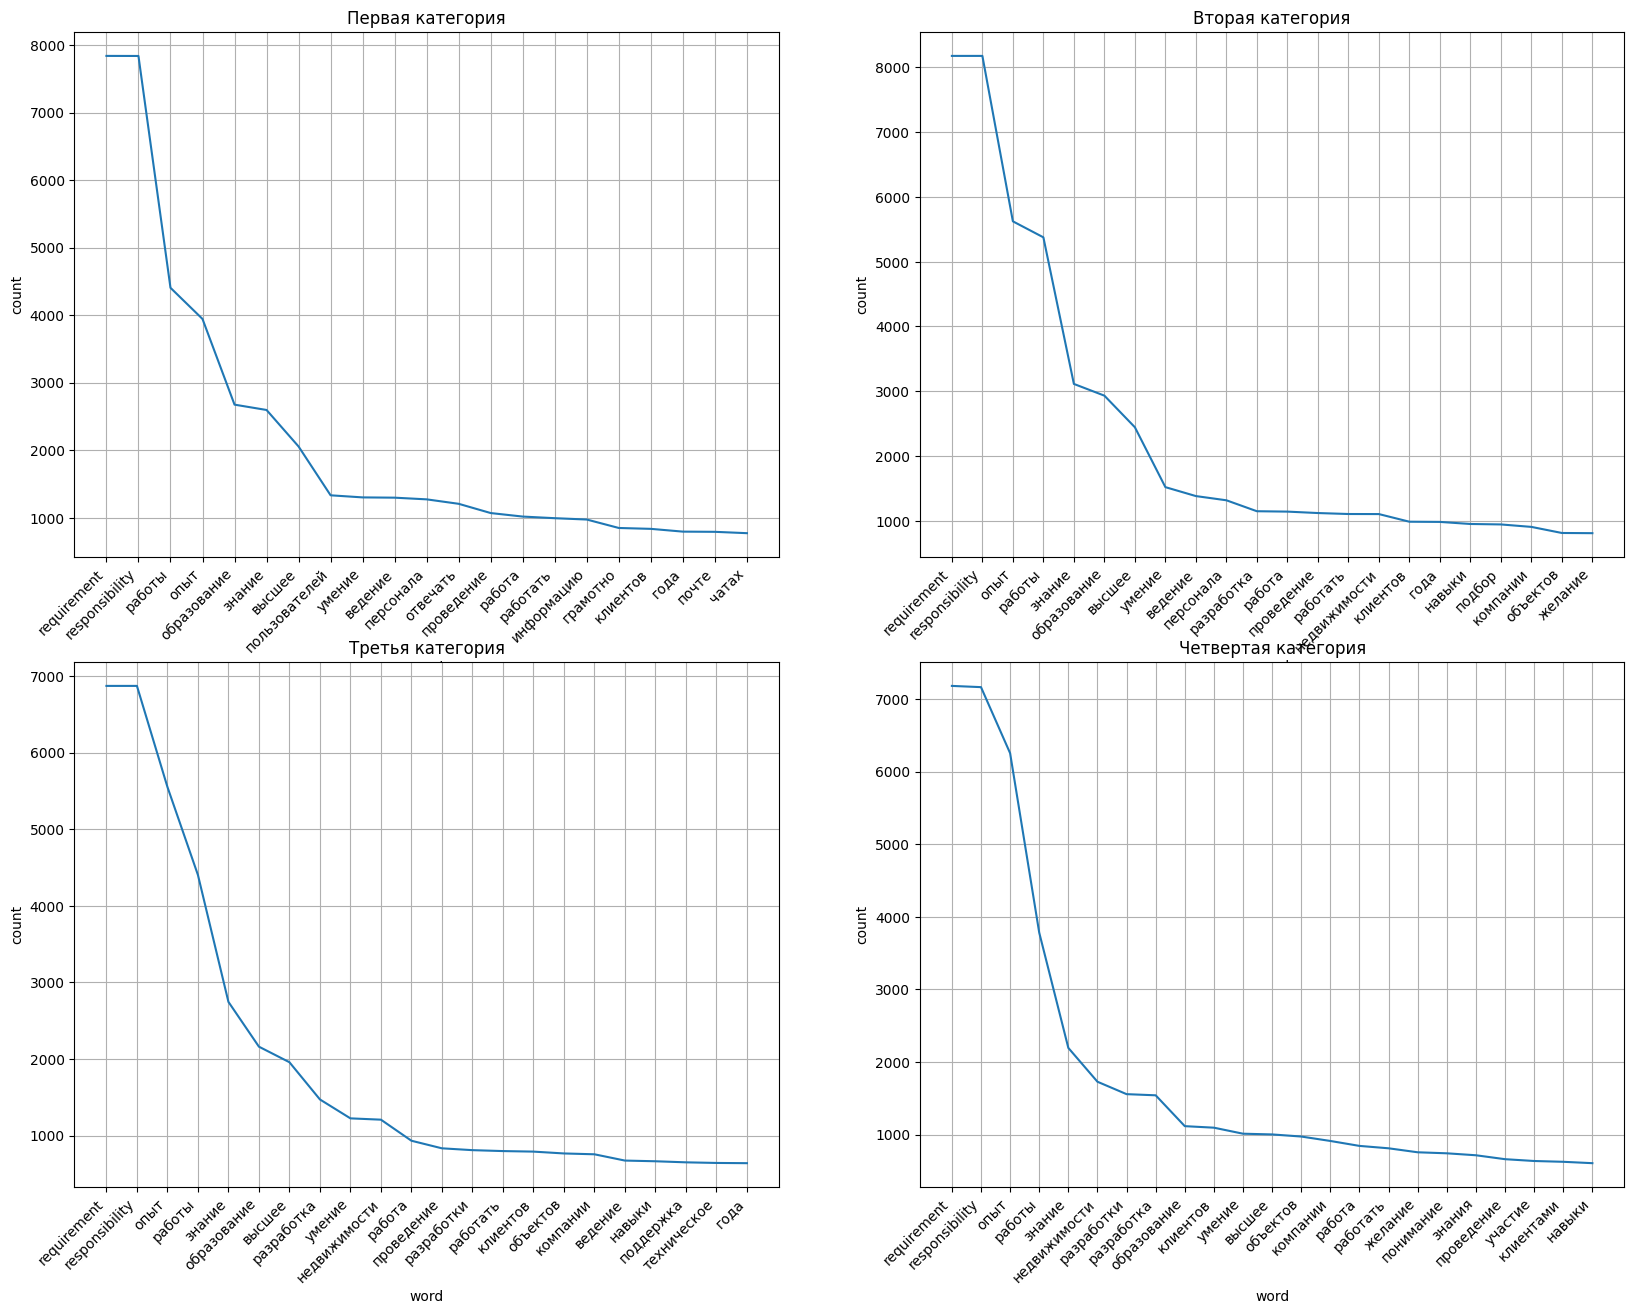

In [31]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2 ,figsize=(20, 15))
sns.lineplot(data=words_data_1, x='word', y='count', ax=ax1)
# plt.xticks(rotation=90)
sns.lineplot(data=words_data_2, x='word', y='count', ax=ax2)
# plt.xticks(rotation=90)
sns.lineplot(data=words_data_3, x='word', y='count', ax=ax3)
# plt.xticks(rotation=90)
sns.lineplot(data=words_data_4, x='word', y='count', ax=ax4)
# plt.xticks(rotation=90)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")

ax1.set_title('Первая категория')
ax2.set_title('Вторая категория')
ax3.set_title('Третья категория')
ax4.set_title('Четвертая категория')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

In [32]:
# выделим самых ЯРКИХ представителей каждого класса

# по первой категории: пользователей | ведение | персонала | клиентов | почте | чатах : частотный диапазон [0,1)
# по второй категории: ведение | персонала | разработка | желание : частотный диапазон [1,2)
# по третьей категории: разработка | недвижимости | техническое : частотный диапазон [2,3)
# по четвёртой категории: недвижимости |  разработка | клиентов | желание : частотный диапазон [3,4)

# заменим колонку stippet на самые популярные слова через формулу
# для эксперимена возьмём первый квартильный уровень
# для каждого объекта посчитаем количество определённых слов

def counts_words(column: pd.DataFrame, words:list):
	_dict = {}
	for word in words:
		word_column = column.apply(lambda x: x.lower().count(word))
		_dict[word] = word_column
	return _dict


Text(0.5, 1.0, 'Четвёртая категория')

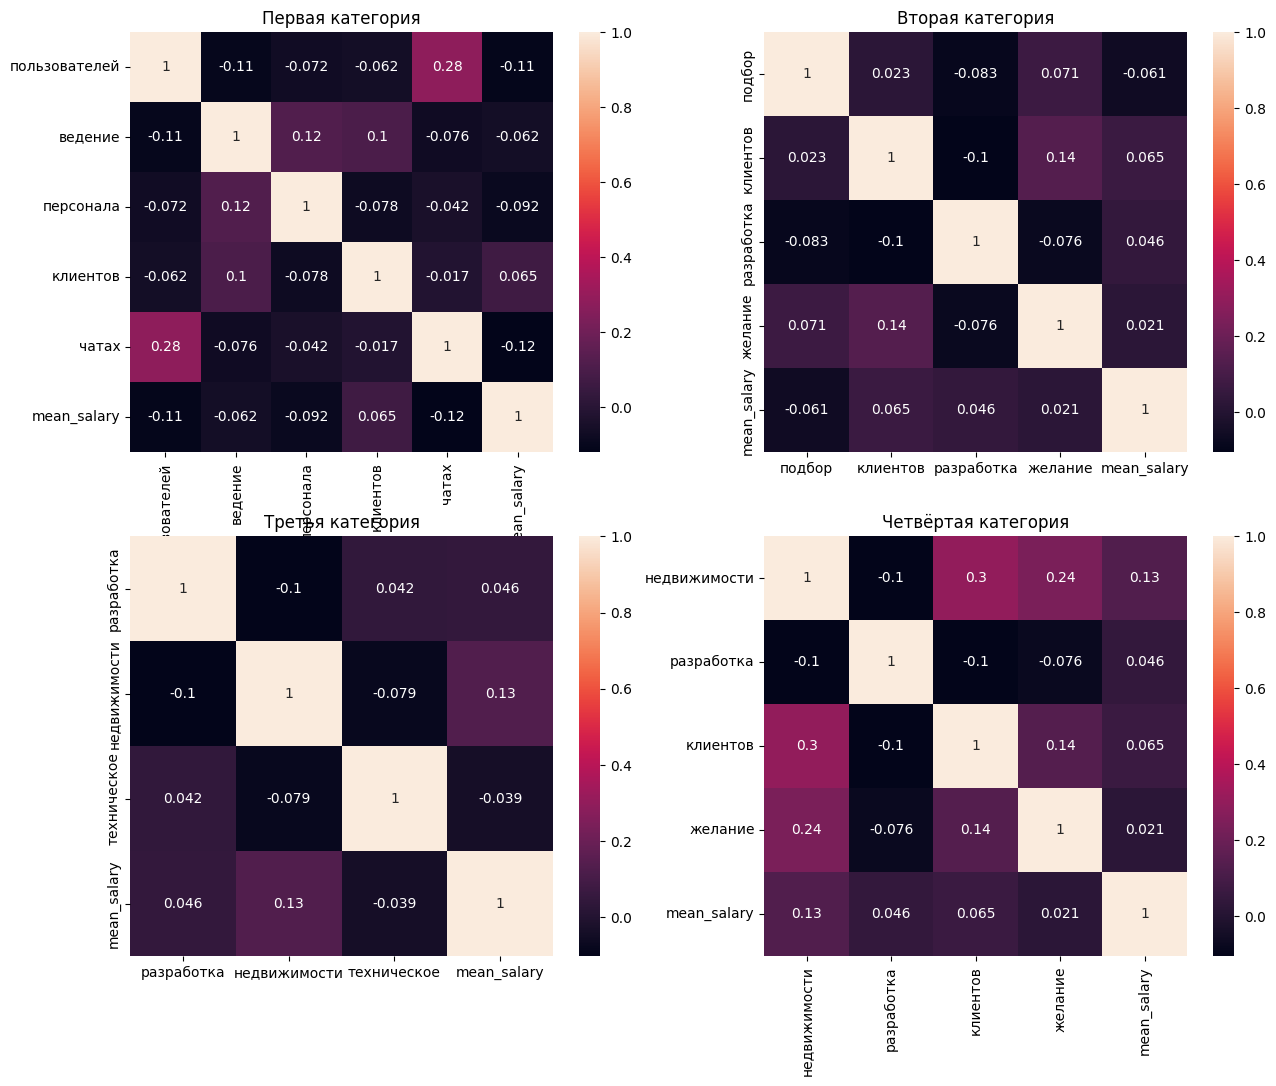

In [33]:
# удалим слово "почте", у них слишком высокая межпризнаковая корреляция
words = ['пользователей', 'ведение', 'персонала', 'клиентов', 'чатах']
counts_words(filtred_train_data_dropped['snippet'], words)

category_1_dataframe = pd.DataFrame(counts_words(filtred_train_data_dropped['snippet'], words))
category_1_dataframe['mean_salary'] = filtred_train_data_dropped['mean_salary']


# аналогично проведём с дпугими словами
words = ['подбор', 'клиентов', 'разработка', 'желание']

category_2_dataframe = pd.DataFrame(counts_words(filtred_train_data_dropped['snippet'], words))
category_2_dataframe['mean_salary'] = filtred_train_data_dropped['mean_salary']


words = ['разработка', 'недвижимости', 'техническое']

category_3_dataframe = pd.DataFrame(counts_words(filtred_train_data_dropped['snippet'], words))
category_3_dataframe['mean_salary'] = filtred_train_data_dropped['mean_salary']


words = ["недвижимости",  "разработка", "клиентов", "желание"]

category_4_dataframe = pd.DataFrame(counts_words(filtred_train_data_dropped['snippet'], words))
category_4_dataframe['mean_salary'] = filtred_train_data_dropped['mean_salary']


fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12))

sns.heatmap(category_1_dataframe.corr(), annot=True, ax=ax1)
ax1.set_title('Первая категория')
sns.heatmap(category_2_dataframe.corr(), annot=True, ax=ax2)
ax2.set_title('Вторая категория')
sns.heatmap(category_3_dataframe.corr(), annot=True, ax=ax3)
ax3.set_title('Третья категория')
sns.heatmap(category_4_dataframe.corr(), annot=True, ax=ax4)
ax4.set_title('Четвёртая категория')

In [35]:
train_data['employer'] = train_data['employer'].apply(lambda x: ast.literal_eval(x)['name'] if isinstance(x, str) else 'Неизвестен работодатель')
test_data['employer'] = test_data['employer'].apply(lambda x: ast.literal_eval(x)['name'] if isinstance(x, str) else 'Неизвестен работодатель')

ValueError: malformed node or string on line 1: <ast.Name object at 0x790a39525ff0>

In [36]:
train_data['requirement'] = train_data['snippet'].apply(lambda x: ast.literal_eval(x)['requirement'] if isinstance(x, str) else 'Требования не указаны')
train_data['responsibility'] = train_data['snippet'].apply(lambda x: ast.literal_eval(x)['responsibility'] if isinstance(x, str) else 'Обязанности не указаны')

test_data['requirement'] = test_data['snippet'].apply(lambda x: ast.literal_eval(x)['requirement'] if isinstance(x, str) else 'Требования не указаны')
test_data['responsibility'] = test_data['snippet'].apply(lambda x: ast.literal_eval(x)['responsibility'] if isinstance(x, str) else 'Обязанности не указаны')

In [37]:
# #NaN
train_data.drop(['immediate_redirect_url'], axis=1, inplace=True)
test_data.drop(['immediate_redirect_url'], axis=1, inplace=True)
#
train_data.drop(['type'], axis=1, inplace=True)
test_data.drop(['type'], axis=1, inplace=True)
#
# #NaN
train_data.drop(['working_days'], axis=1, inplace=True)
test_data.drop(['working_days'], axis=1, inplace=True)
#NaN
train_data.drop(['working_time_modes'], axis=1, inplace=True)
test_data.drop(['working_time_modes'], axis=1, inplace=True)
#
train_data.drop(['working_time_intervals'], axis=1, inplace=True)
test_data.drop(['working_time_intervals'], axis=1, inplace=True)

train_data.drop(['accept_temporary'], axis=1, inplace=True)
test_data.drop(['accept_temporary'], axis=1, inplace=True)

train_data.drop(['response_url'], axis=1, inplace=True)
test_data.drop(['response_url'], axis=1, inplace=True)

train_data.drop(['sort_point_distance'], axis=1, inplace=True)
test_data.drop(['sort_point_distance'], axis=1, inplace=True)

train_data.drop(['archived'], axis=1, inplace=True)
test_data.drop(['archived'], axis=1, inplace=True)

train_data.drop(['published_at'], axis=1, inplace=True)
test_data.drop(['published_at'], axis=1, inplace=True)

train_data.drop(['created_at'], axis=1, inplace=True)
test_data.drop(['created_at'], axis=1, inplace=True)

train_data.drop(['insider_interview'], axis=1, inplace=True)
test_data.drop(['insider_interview'], axis=1, inplace=True)

train_data.drop(['relations'], axis=1, inplace=True)
test_data.drop(['relations'], axis=1, inplace=True)

# train_data.drop(['employer'], axis=1, inplace=True)
# test_data.drop(['employer'], axis=1, inplace=True)

train_data.drop(['snippet'], axis=1, inplace=True)
test_data.drop(['snippet'], axis=1, inplace=True)

train_data.drop(['contacts'], axis=1, inplace=True)
test_data.drop(['contacts'], axis=1, inplace=True)
#
# # train_data['area'] = train_data['area'].apply(lambda x: ast.literal_eval(x)['id'])
# # test_data['area'] = test_data['area'].apply(lambda x: ast.literal_eval(x)['id'])


In [38]:
train_data['experience'] = train_data['experience'].apply(lambda x: eval(x)['name'] if isinstance(eval(x), dict) else x)
test_data['experience'] = test_data['experience'].apply(lambda x: eval(x)['name'] if isinstance(eval(x), dict) else x)

train_data['area'] = train_data['area'].apply(lambda x: eval(x)['name'] if isinstance(eval(x), dict) else x)
test_data['area'] = test_data['area'].apply(lambda x: eval(x)['name'] if isinstance(eval(x), dict) else x)

In [ ]:
# all_cities = []
# all_names = []
#
# for i in range(len(train_data['area'])):
#     all_cities.append(train_data['area'].iloc[i])
#     all_names.append(train_data['name'].iloc[i])
#
# for i in range(len(test_data['area'])):
#     all_cities.append(test_data['area'].iloc[i])
#     all_names.append(test_data['name'].iloc[i])
#
#
# city2idx = {city: idx for idx, city in enumerate(set(all_cities))}
# name2idx = {city: idx for idx, city in enumerate(set(all_names))}

In [ ]:
# train_data['area'] = train_data['area'].map(city2idx)
# train_data['name'] = train_data['name'].map(name2idx)
#
# test_data['area'] = test_data['area'].map(city2idx)
# test_data['name'] = test_data['name'].map(name2idx)

In [39]:
train_data_encoded = pd.get_dummies(train_data, columns=[ 'schedule', 'experience', 'region', ], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=[ 'schedule', 'experience', 'region', ], drop_first=True)

In [40]:
# train_data_encoded[['premium', 'has_test', 'response_letter_required','mean_salary', '']]
not_columns = ['department', 'address', 'url', 'alternate_url', 'description']
needed_cols = [c for c in train_data_encoded.columns if c not in not_columns]


In [41]:
train = train_data_encoded[needed_cols]
test = test_data_encoded[[c for c in needed_cols if c != 'mean_salary']]

In [42]:
train['key_skills'] = train['key_skills'].apply(lambda x: ast.literal_eval(x))
test['key_skills'] = test['key_skills'].apply(lambda x: ast.literal_eval(x))

train['key_skills'] = train['key_skills'].apply(lambda x: [d['name'] for d in x])
test['key_skills'] = test['key_skills'].apply(lambda x: [d['name'] for d in x])

train['specializations'] = train['specializations'].apply(lambda x: ast.literal_eval(x))
test['specializations'] = test['specializations'].apply(lambda x: ast.literal_eval(x))

train['specializations'] = train['specializations'].apply(lambda x: [d['name'] for d in x])
test['specializations'] = test['specializations'].apply(lambda x: [d['name'] for d in x])

<ipython-input-42-4eabe6a6ab2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['key_skills'] = train['key_skills'].apply(lambda x: ast.literal_eval(x))
<ipython-input-42-4eabe6a6ab2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['key_skills'] = test['key_skills'].apply(lambda x: ast.literal_eval(x))
<ipython-input-42-4eabe6a6ab2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [43]:
train['specializations']


,specializations
0,"[Агент, Жилье, Начальный уровень, Мало опыта, ..."
1,"[Начальный уровень, Мало опыта, Системный адми..."
2,"[Программирование, Разработка, Системы управле..."
3,"[Менеджмент продукта (Product manager), Управл..."
4,[Машиностроение]
...,...
30067,[Другое]
30068,"[Рекрутмент, Управление персоналом, Учет кадро..."
30069,"[Программирование, Разработка, Системы управле..."
30070,"[Программирование, Разработка, Системы управле..."


In [44]:
train_keywords = train['key_skills'].apply(lambda x: ", ".join(x))
test_keywords = test['key_skills'].apply(lambda x: ", ".join(x))

In [45]:
train_keywords_spec = train['specializations'].apply(lambda x: ", ".join(x))
test_keywords_spec = test['specializations'].apply(lambda x: ", ".join(x))

In [46]:
train_keywords.values[0]

'Жилая недвижимость, Активные продажи, Подбор недвижимости по запросу клиента, Недвижимость, Вторичная недвижимость, продажа недвижимости'

In [ ]:
# train_resposibilities = train_data['responsibility']
# test_resposibilities = test_data['responsibility']
#
# train_requirements = train_data['requirement']
# test_requirements = test_data['requirement']

In [47]:
train_data['responsibility'] = train_data['responsibility'].fillna('-')
test_data['responsibility'] = test_data['responsibility'].fillna('-')

In [48]:
train_data['requirement'] = train_data['requirement'].fillna('-')
test_data['requirement'] = test_data['requirement'].fillna('-')

In [49]:
tfidf_vectorizer_skills = TfidfVectorizer()
tfidf_vectorizer_spec = TfidfVectorizer()

tfidf_vectorizer_requirement = TfidfVectorizer()
tfidf_vectorizer_responsibility = TfidfVectorizer()

train_skills_tfidf = tfidf_vectorizer_skills.fit_transform(train_keywords).toarray()
test_skills_tfidf = tfidf_vectorizer_skills.transform(test_keywords).toarray()

train_spec_tfidf = tfidf_vectorizer_spec.fit_transform(train_keywords_spec).toarray()
test_spec_tfidf = tfidf_vectorizer_spec.transform(test_keywords_spec).toarray()

train_resposib_tfidf = tfidf_vectorizer_responsibility.fit_transform(train_data['responsibility']).toarray()
test_resposib_tfidf = tfidf_vectorizer_responsibility.transform(test_data['responsibility']).toarray()

train_requir_tfidf = tfidf_vectorizer_requirement.fit_transform(train_data['requirement']).toarray()
test_requir_tfidf = tfidf_vectorizer_requirement.transform(test_data['requirement']).toarray()



In [50]:
tfidf_vectorizer_empl = TfidfVectorizer()
tfidf_vectorizer_name = TfidfVectorizer()

In [51]:
train_empl_tfidf = tfidf_vectorizer_empl.fit_transform(train_data['employer']).toarray()
test_empl_tfidf = tfidf_vectorizer_empl.transform(test_data['employer']).toarray()

train_name_tfidf = tfidf_vectorizer_name.fit_transform(train_data['name']).toarray()
test_name_tfidf = tfidf_vectorizer_name.transform(test_data['name']).toarray()

In [52]:
train_empl_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

# train_skills_giga = pd.read_csv('/Users/gd/Downloads/train_keywords_giga_embs.csv')
# test_skills_giga = pd.read_csv('/Users/gd/Downloads/test_keywords_giga_embs.csv')
#
# train_spec_giga = pd.read_csv('/Users/gd/Downloads/embs_train_spec_keywords.csv')
# test_spec_giga = pd.read_csv('/Users/gd/Downloads/test_spec_keywords_giga_embs.csv')



In [ ]:
# train_skills_giga.columns = [f'giga_{i}' for i in range(1024)]
# test_skills_giga.columns = [f'giga_{i}' for i in range(1024)]
#
# train_spec_giga.columns = [f'giga__{i}' for i in range(1024)]
# test_spec_giga.columns = [f'giga__{i}' for i in range(1024)]

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Инициализация CountVectorizer
# bow_vectorizer_skills = CountVectorizer()
# bow_vectorizer_spec = CountVectorizer()

# # Преобразование текстов в мешок слов
# train_skills_bow = bow_vectorizer_skills.fit_transform(train_keywords).toarray()
# test_skills_bow = bow_vectorizer_skills.transform(test_keywords).toarray()

# train_spec_bow = bow_vectorizer_spec.fit_transform(train_keywords_spec).toarray()
# test_spec_bow = bow_vectorizer_spec.transform(test_keywords_spec).toarray()


In [ ]:
# pca_skills = PCA(n_components=100)
# pca_spec = PCA(n_components=100)
#
# train_giga_skills_reduced = pca_skills.fit_transform(train_skills_giga)
# test_giga_skills_reduced = pca_skills.transform(test_skills_giga)
#
# train_giga_spec_reduced = pca_spec.fit_transform(train_spec_giga)
# test_giga_spec_reduced = pca_spec.transform(test_spec_giga)
#
#
# # train_bow_skills_reduced = pca_skills.fit_transform(train_skills_bow)
# # test_bow_skills_reduced = pca_skills.transform(test_skills_bow)
#
# # train_bow_spec_reduced = pca_spec.fit_transform(train_spec_bow)
# # test_bow_spec_reduced = pca_spec.transform(test_spec_bow)
#


: 

In [53]:
pca_skills = PCA(n_components=100)
pca_spec = PCA(n_components=100)

pca_requir = PCA(n_components=100)
pca_responsib = PCA(n_components=100)

pca_name = PCA(n_components=100)
pca_empl = PCA(n_components=100)

train_tfidf_skills_reduced = pca_skills.fit_transform(train_skills_tfidf)
test_tfidf_skills_reduced = pca_skills.transform(test_skills_tfidf)

train_tfidf_spec_reduced = pca_spec.fit_transform(train_spec_tfidf)
test_tfidf_spec_reduced = pca_spec.transform(test_spec_tfidf)

train_tfidf_requir_reduced = pca_requir.fit_transform(train_requir_tfidf)
test_tfidf_requir_reduced = pca_requir.transform(test_requir_tfidf)

train_tfidf_responsib_reduced = pca_responsib.fit_transform(train_resposib_tfidf)
test_tfidf_responsib_reduced = pca_responsib.transform(test_resposib_tfidf)

train_tfidf_name_reduced = pca_name.fit_transform(train_name_tfidf)
test_tfidf_name_reduced = pca_name.transform(test_name_tfidf)

train_tfidf_empl_reduced = pca_empl.fit_transform(train_empl_tfidf)
test_tfidf_empl_reduced = pca_empl.transform(test_empl_tfidf)

# train_bow_skills_reduced = pca_skills.fit_transform(train_skills_bow)
# test_bow_skills_reduced = pca_skills.transform(test_skills_bow)
#
# train_bow_spec_reduced = pca_spec.fit_transform(train_spec_bow)
# test_bow_spec_reduced = pca_spec.transform(test_spec_bow)



In [ ]:
# train_giga_skills_reduced = pd.DataFrame(train_giga_skills_reduced, columns=[f"giga_skills_pca_{i}" for i in range(len(train_giga_skills_reduced[0]))])
# test_giga_skills_reduced = pd.DataFrame(test_giga_skills_reduced, columns=[f"giga_skills_pca_{i}" for i in range(len(test_giga_skills_reduced[0]))])
#
# train_giga_spec_reduced = pd.DataFrame(train_giga_spec_reduced, columns=[f"giga_spec_pca_{i}" for i in range(len(train_giga_spec_reduced[0]))])
# test_giga_spec_reduced = pd.DataFrame(test_giga_spec_reduced, columns=[f"giga_spec_pca_{i}" for i in range(len(test_giga_spec_reduced[0]))])

In [54]:
train_tfidf_skills_reduced = pd.DataFrame(train_tfidf_skills_reduced, columns=[f"tfidf_skills_pca_{i}" for i in range(len(train_tfidf_skills_reduced[0]))])
test_tfidf_skills_reduced = pd.DataFrame(test_tfidf_skills_reduced, columns=[f"tfidf_skills_pca_{i}" for i in range(len(test_tfidf_skills_reduced[0]))])

train_tfidf_spec_reduced = pd.DataFrame(train_tfidf_spec_reduced, columns=[f"tfidf_spec_pca_{i}" for i in range(len(train_tfidf_spec_reduced[0]))])
test_tfidf_spec_reduced = pd.DataFrame(test_tfidf_spec_reduced, columns=[f"tfidf_spec_pca_{i}" for i in range(len(test_tfidf_spec_reduced[0]))])

train_tfidf_requir_reduced = pd.DataFrame(train_tfidf_requir_reduced, columns=[f"tfidf_requir_pca_{i}" for i in range(len(train_tfidf_requir_reduced[0]))])
test_tfidf_requir_reduced = pd.DataFrame(test_tfidf_requir_reduced, columns=[f"tfidf_requir_pca_{i}" for i in range(len(test_tfidf_requir_reduced[0]))])

train_tfidf_responsib_reduced = pd.DataFrame(train_tfidf_responsib_reduced, columns=[f"tfidf_responsib_pca_{i}" for i in range(len(train_tfidf_responsib_reduced[0]))])
test_tfidf_responsib_reduced = pd.DataFrame(test_tfidf_responsib_reduced, columns=[f"tfidf_responsib_pca_{i}" for i in range(len(test_tfidf_responsib_reduced[0]))])

train_tfidf_name_reduced = pd.DataFrame(train_tfidf_name_reduced, columns=[f"tfidf_name_pca_{i}" for i in range(len(train_tfidf_name_reduced[0]))])
test_tfidf_name_reduced = pd.DataFrame(test_tfidf_name_reduced, columns=[f"tfidf_name_pca_{i}" for i in range(len(test_tfidf_name_reduced[0]))])

train_tfidf_empl_reduced = pd.DataFrame(train_tfidf_empl_reduced, columns=[f"tfidf_empl_pca_{i}" for i in range(len(train_tfidf_empl_reduced[0]))])
test_tfidf_empl_reduced = pd.DataFrame(test_tfidf_empl_reduced, columns=[f"tfidf_empl_pca_{i}" for i in range(len(test_tfidf_empl_reduced[0]))])

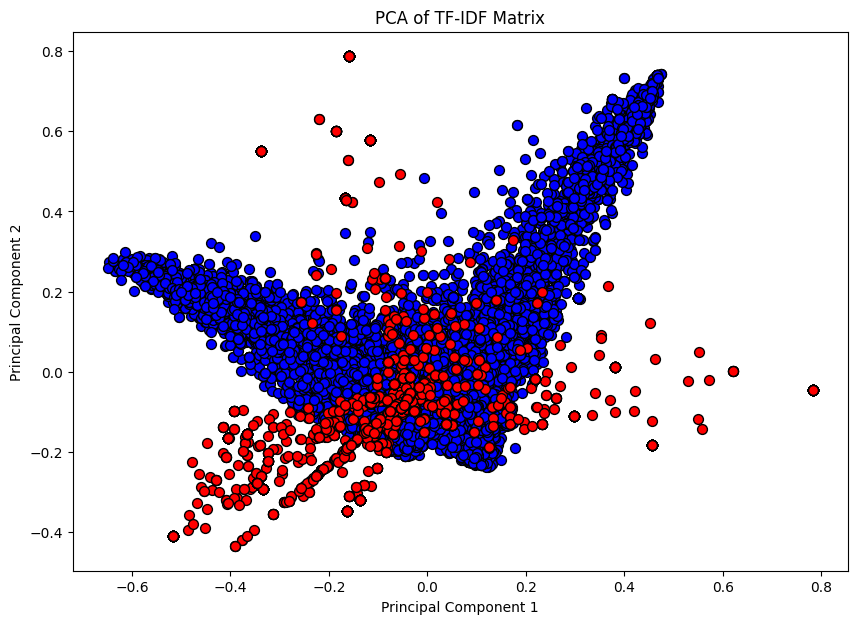

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(train_tfidf_skills_reduced.iloc[:, 0], train_tfidf_skills_reduced.iloc[:, 1], c='blue', edgecolor='k', s=50)
plt.scatter(train_tfidf_spec_reduced.iloc[:, 0], train_tfidf_spec_reduced.iloc[:, 1], c='red', edgecolor='k', s=50)
# for i, txt in enumerate(train_keywords):
#     plt.annotate(i, (train_skills_tsne[i, 0], train_skills_tsne[i, 1]))
plt.title('PCA of TF-IDF Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [56]:
test_tfidf_responsib_reduced

,tfidf_responsib_pca_0,tfidf_responsib_pca_1,tfidf_responsib_pca_2,tfidf_responsib_pca_3,tfidf_responsib_pca_4,tfidf_responsib_pca_5,tfidf_responsib_pca_6,tfidf_responsib_pca_7,tfidf_responsib_pca_8,tfidf_responsib_pca_9,...,tfidf_responsib_pca_90,tfidf_responsib_pca_91,tfidf_responsib_pca_92,tfidf_responsib_pca_93,tfidf_responsib_pca_94,tfidf_responsib_pca_95,tfidf_responsib_pca_96,tfidf_responsib_pca_97,tfidf_responsib_pca_98,tfidf_responsib_pca_99
0,-0.026849,-0.057682,0.004851,-0.006797,0.014477,-0.024600,-0.073060,-0.065577,-0.015853,0.051162,...,0.004799,-0.052750,-0.020992,-0.069073,0.044583,0.030692,-0.012922,0.023672,-0.069081,0.011855
1,-0.032666,0.073500,-0.198935,-0.016272,0.017454,-0.199920,0.213161,0.046334,0.126190,0.183180,...,-0.056946,-0.023380,-0.031592,0.013177,-0.064358,-0.044786,0.001519,-0.023007,-0.019546,0.001175
2,0.004106,-0.032947,-0.014484,-0.022888,-0.020329,-0.012345,-0.048719,-0.014748,0.018631,-0.045404,...,-0.008244,0.012558,-0.004836,0.007201,-0.004957,0.017616,-0.012099,-0.005238,0.006584,0.000372
3,-0.035784,-0.142220,0.128265,0.001575,-0.026298,0.011855,-0.013589,-0.136275,-0.129561,0.270358,...,-0.020876,-0.012522,-0.016731,0.005149,-0.004924,-0.011717,-0.010982,0.000901,-0.006710,0.009357
4,-0.024450,-0.031931,0.023654,-0.013482,-0.061863,0.030861,0.017964,0.003986,0.000400,-0.016466,...,0.010768,-0.004459,-0.017314,0.012565,0.009405,0.010446,-0.006101,0.009922,0.036508,0.007461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7513,-0.036785,0.011277,-0.272908,-0.025314,0.054745,-0.223475,0.243393,0.011094,-0.211446,-0.024839,...,0.038416,-0.028598,0.025195,0.005626,0.033084,-0.001341,-0.029997,0.011298,-0.059149,-0.011825
7514,0.014746,-0.007108,-0.130615,-0.057180,0.075009,0.051053,0.008064,0.039356,-0.053018,-0.023373,...,-0.056627,0.018896,-0.081273,-0.044545,0.055201,0.055731,-0.044452,-0.017189,-0.036130,-0.027373
7515,-0.027490,-0.060447,0.000546,-0.001753,0.013669,-0.027451,-0.075656,-0.033648,0.023693,-0.032360,...,-0.038337,0.016913,0.013020,0.023303,0.005210,0.028578,-0.024532,-0.033355,-0.045717,-0.067536
7516,0.057483,-0.061708,0.042736,-0.022469,0.031567,-0.072699,-0.073429,-0.062326,-0.028320,-0.024530,...,0.002875,0.022222,0.042661,0.002720,-0.004283,-0.042885,-0.080164,-0.024673,-0.035048,0.048779


In [ ]:
# train_bow_skills_reduced = pd.DataFrame(train_bow_skills_reduced, columns=[f"bow_skills_pca_{i}" for i in range(len(train_bow_skills_reduced[0]))])
# test_bow_skills_reduced = pd.DataFrame(test_bow_skills_reduced, columns=[f"bow_skills_pca_{i}" for i in range(len(test_bow_skills_reduced[0]))])

# train_bow_spec_reduced = pd.DataFrame(train_bow_spec_reduced, columns=[f"bow_spec_pca_{i}" for i in range(len(train_bow_spec_reduced[0]))])
# test_bow_spec_reduced = pd.DataFrame(test_bow_spec_reduced, columns=[f"bow_spec_pca_{i}" for i in range(len(test_bow_spec_reduced[0]))])

In [ ]:
# train = pd.concat([train,train_giga_skills_reduced, train_giga_spec_reduced], axis=1)
# test = pd.concat([test,test_giga_skills_reduced, test_giga_spec_reduced], axis=1)

In [ ]:
# train = pd.concat([train,train_skills_giga, train_spec_giga], axis=1)
# test = pd.concat([test,test_skills_giga, test_spec_giga], axis=1)

In [57]:
train = pd.concat([train,train_tfidf_skills_reduced, train_tfidf_spec_reduced, train_tfidf_responsib_reduced, train_tfidf_requir_reduced, train_tfidf_name_reduced, train_tfidf_empl_reduced], axis=1)
test = pd.concat([test,test_tfidf_skills_reduced, test_tfidf_spec_reduced, test_tfidf_responsib_reduced, test_tfidf_requir_reduced, test_tfidf_name_reduced, test_tfidf_empl_reduced], axis=1)

In [58]:
# train = pd.concat([train,train_bow_skills_reduced, train_bow_spec_reduced], axis=1)
# test = pd.concat([test,test_bow_skills_reduced, test_bow_spec_reduced], axis=1)

In [59]:
train.drop(['key_skills', 'specializations'], axis=1, inplace=True)
test.drop(['key_skills', 'specializations'], axis=1, inplace=True)

In [60]:
train.drop(['year', 'month'], axis=1, inplace=True)
test.drop(['year', 'month'], axis=1, inplace=True)

KeyError: "['year', 'month'] not found in axis"

In [61]:
train.drop(['requirement', 'responsibility'], axis=1, inplace=True)
test.drop(['requirement', 'responsibility'], axis=1, inplace=True)

In [62]:
train.drop(['name', 'area',  'employer'], axis=1, inplace=True)
test.drop(['name', 'area', 'employer'], axis=1, inplace=True)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'mean_salary'], train['mean_salary'], test_size=0.25, random_state=42)
# configs = [
#     (None, 'matrix', None, None),
#     ('l2', 'matrix', None, 10.0),
#     ('l2', 'gd', None, 10.0),
#     ('l1', 'gd', 1.0, None),
#     ('l1l2', 'sgd', 1.0, 10.0),
# ]

# for regularization, weight_calc, l1, l2 in configs:
#     model = MyLinearRegression(
#         regularization=regularization,
#         weight_calc=weight_calc,
#         lambda_1=l1,
#         lambda_2=l2,
#         max_iter=100,
#         lr=0.0001
#     )

#     start = time.time()
#     y_train = pd.DataFrame(y_train)
#     y_test = pd.DataFrame(y_test)
#     model.fit(X_train, y_train)
#     train_time = time.time() - start

#     train_score = model.score(X_train, y_train)
#     test_score = model.score(X_test, y_test)
#     prediction_time_start = time.time()
#     y_pred = model.predict(X_test)
#     prediction_time = time.time() - prediction_time_start

#     print(f"regularization={regularization}, weight_calc={weight_calc}, l1={l1}, l2={l2}")
#     print(f"Intercept: {model.intercept_}")
#     print(f"Train R^2: {train_score}, Test R^2: {test_score}")
#     print(f"Training time: {train_time:.6f}s, Prediction time: {prediction_time:.6f}s")
#     print("-"*50)

In [67]:
X_train

,premium,has_test,response_letter_required,"schedule_{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}","schedule_{'id': 'fullDay', 'name': 'Полный день'}","schedule_{'id': 'remote', 'name': 'Удаленная работа'}","schedule_{'id': 'shift', 'name': 'Сменный график'}",experience_Нет опыта,experience_От 1 года до 3 лет,experience_От 3 до 6 лет,...,tfidf_empl_pca_90,tfidf_empl_pca_91,tfidf_empl_pca_92,tfidf_empl_pca_93,tfidf_empl_pca_94,tfidf_empl_pca_95,tfidf_empl_pca_96,tfidf_empl_pca_97,tfidf_empl_pca_98,tfidf_empl_pca_99
6018,False,False,False,False,True,False,False,False,True,False,...,0.008364,-0.006809,-0.007654,-0.006774,-0.007439,-0.004903,-0.002225,-0.000459,-0.002364,0.007020
29804,False,False,False,False,False,True,False,False,False,True,...,0.150650,0.118863,-0.019566,0.016123,0.013553,0.016169,0.028321,0.008036,0.033721,0.008964
29430,False,False,False,False,False,True,False,True,False,False,...,-0.002141,0.002485,-0.006906,-0.002180,-0.010423,0.005218,0.013066,0.002479,0.002854,-0.001881
26273,False,False,False,False,False,True,False,False,False,True,...,-0.052102,-0.083789,0.065286,-0.034062,0.039247,0.048814,0.001635,0.011824,-0.106589,0.116098
17086,False,False,False,False,True,False,False,False,True,False,...,-0.153634,-0.134559,0.072241,-0.206482,0.142223,-0.184932,0.039158,0.301737,-0.191564,-0.214040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,False,False,False,False,True,False,False,False,True,False,...,-0.001049,-0.000893,-0.001162,-0.002069,-0.001949,-0.000663,-0.003673,-0.001407,-0.001573,0.000603
5390,False,False,False,False,True,False,False,True,False,False,...,-0.004912,0.002374,0.000771,-0.005035,-0.004867,0.007577,0.007336,0.012083,0.003279,0.004109
860,False,False,False,False,True,False,False,False,True,False,...,-0.001224,-0.001041,-0.001270,-0.002373,-0.002237,-0.000763,-0.004236,-0.001572,-0.001789,0.000691
15795,False,False,False,False,True,False,False,False,True,False,...,-0.002756,0.009421,-0.008015,0.009012,0.008895,0.006637,-0.010740,-0.009660,0.005266,-0.013261


In [68]:
# ['premium', 'has_test', 'response_letter_required', ']
X_test[X_train.columns[:92]]

,premium,has_test,response_letter_required,"schedule_{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}","schedule_{'id': 'fullDay', 'name': 'Полный день'}","schedule_{'id': 'remote', 'name': 'Удаленная работа'}","schedule_{'id': 'shift', 'name': 'Сменный график'}",experience_Нет опыта,experience_От 1 года до 3 лет,experience_От 3 до 6 лет,...,region_Удмуртская Республика,region_Ульяновская область,region_Хабаровский край,region_Ханты-Мансийский АО - Югра,region_Челябинская область,region_Чеченская республика,region_Чувашская Республика,region_Ямало-Ненецкий АО,region_Ярославская область,tfidf_skills_pca_0
12362,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0.065216
16339,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,-0.297183
10337,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0.063584
26946,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,0.089588
20949,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0.063584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0.054839
15336,False,False,False,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,-0.011780
7046,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0.088800
22093,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,0.040646


In [69]:
X_train[X_train.columns[:91]] = X_train[X_train.columns[:91]].astype(float)
X_test[X_test.columns[:91]] = X_test[X_test.columns[:91]].astype(float)

In [65]:
# нельзя вывести историю обучения ... ну что поделаешь ... перехватим stdout)))
import sys
from io import StringIO
from functools import wraps

def capture_stdout(func):
    """
    Декоратор, который перехватывает stdout во время выполнения функции
    и возвращает его как строку вместе с результатом функции.
    """

    @wraps(func)
    def wrapper(*args, **kwargs):
        # Сохраняем оригинальный stdout
        original_stdout = sys.stdout

        # Создаем буфер для перехвата вывода
        captured_output = StringIO()

        try:
            # Перенаправляем stdout в наш буфер
            sys.stdout = captured_output

            # Вызываем декорируемую функцию
            result = func(*args, **kwargs)

            # Получаем всё, что было напечатано во время выполнения функции
            captured_output.seek(0)
            output = captured_output.read()
        finally:
            # Возвращаем stdout к нормальному состоянию
            sys.stdout = original_stdout

        # Если нужно, можно вернуть и результат функции, и захваченный вывод
        return result, output.strip() if output else None

    return wrapper

In [71]:
!pip install xgboost
!pip install catboost
!pip install catboost
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
ensemble_model = VotingRegressor([
    # ("catboost", CatBoostRegressor(n_estimators=1000, eval_metric='MAE', learning_rate=0.06, random_seed=42,
    # early_stopping_rounds=50, cat_features=list(X_train.columns[:91]), depth=10, l2_leaf_reg=8))

    ("catboost", CatBoostRegressor(n_estimators=10000, learning_rate=0.1, random_seed=42)),
    ("xgb", XGBRegressor(n_estimators=10000,learning_rate=0.1,seed=42,verbosity=2 )),
    # ("gbm", GradientBoostingRegressor()),
#
])
# xgb = XGBRegressor()
@capture_stdout
def train():
	ensemble_model = VotingRegressor([
    # ("catboost", CatBoostRegressor(n_estimators=1000, eval_metric='MAE', learning_rate=0.06, random_seed=42,
    # early_stopping_rounds=50, cat_features=list(X_train.columns[:91]), depth=10, l2_leaf_reg=8))

    ("catboost", CatBoostRegressor(n_estimators=10000, learning_rate=0.1, random_seed=42)),
    ("xgb", XGBRegressor(n_estimators=10000,learning_rate=0.1,seed=42,verbosity=2 )),
		# ("gbm", GradientBoostingRegressor()),
	#
	])

	fitted_model = ensemble_model.fit(X=X_train, y=y_train)

# xgb.fit(X=X_train, y=y_train, verbose=True)

	y_pred = ensemble_model.predict(X_test)

	return ensemble_model

en = train()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.2 MB/s eta 0:00:00


In [72]:
rs_arr = en[1].split('\t')
rs_arr
def return_float_learn(x):
	new = lambda x: x.startswith('learn:')
	if new(x):
		return float(x.split(':')[1])
	else:
		return None
rs_arr = [return_float_learn(i) for i in rs_arr if i != '']

In [73]:
np_arr_rs = np.array(rs_arr)
np_arr_rs = np_arr_rs[np_arr_rs != None]
np_arr_rs

array([102381.7361329, 99421.5256988, 96737.0163313, ..., 3558.1874342,
       3558.1431451, 3557.959794], dtype=object)

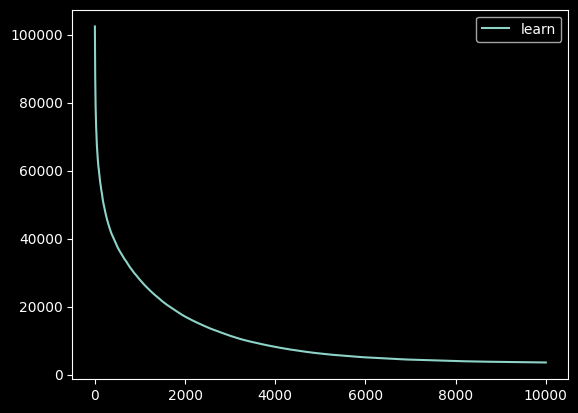

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('dark_background')

sns.lineplot(x=range(len(np_arr_rs)), y=np_arr_rs)
plt.legend(['learn'])
plt.show()

In [75]:
np_arr_rs = np.array(rs_arr)
np_arr_rs = np_arr_rs[np_arr_rs != None]
np_arr_rs

array([102381.7361329, 99421.5256988, 96737.0163313, ..., 3558.1874342,
       3558.1431451, 3557.959794], dtype=object)

In [76]:
# Базовые модели
catboost_model = CatBoostRegressor(
    n_estimators=10000,
    learning_rate=0.06,
    random_seed=42,
    silent=True  # Отключаем вывод логов
)

xgb_model = XGBRegressor(
    n_estimators=10000,
    learning_rate=0.06,
    seed=42,
    verbosity=0  # Отключаем вывод логов
)

# Ансамблевая модель
ensemble_model = VotingRegressor([
    ("catboost", catboost_model),
    ("xgb", xgb_model)
])

# Обучение моделей
catboost_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('catboost',
                             <catboost.core.CatBoostRegressor object at 0x790a329ecad0>),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.06, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=10000, n_jobs=None,
                                          num_parallel_tree=None, ...))])

In [78]:
y_pred_catboost = catboost_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_ensemble = ensemble_model.predict(X_test)

MAE:
CatBoost: 26796.71
XGBoost: 27121.16
Voting Regressor: 26336.65


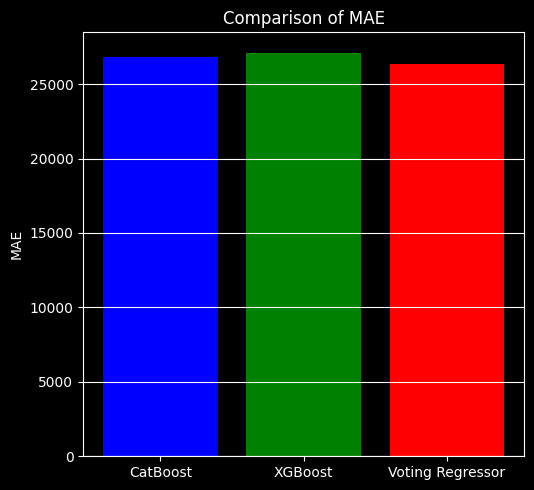

In [79]:
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

# Вывод ошибок
print(f"MAE:\nCatBoost: {mae_catboost:.2f}\nXGBoost: {mae_xgb:.2f}\nVoting Regressor: {mae_ensemble:.2f}")

# Визуализация ошибок
errors_mae = [mae_catboost, mae_xgb, mae_ensemble]
models = ['CatBoost', 'XGBoost', 'Voting Regressor']

plt.figure(figsize=(10, 5))

# MAE
plt.subplot(1, 2, 1)
plt.bar(models, errors_mae, color=['blue', 'green', 'red'])
plt.title("Comparison of MAE")
plt.ylabel("MAE")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble.weight_boosting import AdaBoostRegressor
from sklearn import linear_model
ensemble_model = VotingRegressor([
    # ("catboost", CatBoostRegressor(n_estimators=1000, eval_metric='MAE', learning_rate=0.06, random_seed=42,
    # early_stopping_rounds=50, cat_features=list(X_train.columns[:91]), depth=10, l2_leaf_reg=8))
    # ("svr", svm.SVR()),
    ("catboost", CatBoostRegressor()),
    ("nn",KNeighborsRegressor()),
    ("ridge",linear_model.Ridge()),
    ("xgb", XGBRegressor()),
    ("gbm", GradientBoostingRegressor()),
#
])
ensemble_model.fit(X=X_train, y=y_train)

y_pred = ensemble_model.predict(X_test)

Learning rate set to 0.066987
0:	learn: 103303.6300053	total: 70.8ms	remaining: 1m 10s
1:	learn: 101205.2623233	total: 114ms	remaining: 56.8s
2:	learn: 99420.7009767	total: 168ms	remaining: 55.8s
3:	learn: 97909.4446702	total: 220ms	remaining: 54.8s
4:	learn: 96227.5890839	total: 272ms	remaining: 54.1s
5:	learn: 94726.8014430	total: 314ms	remaining: 52.1s
6:	learn: 93390.1504848	total: 358ms	remaining: 50.9s
7:	learn: 92192.1551063	total: 401ms	remaining: 49.8s
8:	learn: 91211.5646102	total: 447ms	remaining: 49.2s
9:	learn: 89953.1806897	total: 494ms	remaining: 48.9s
10:	learn: 88992.1345273	total: 539ms	remaining: 48.5s
11:	learn: 88072.5673871	total: 578ms	remaining: 47.6s
12:	learn: 87244.9147474	total: 619ms	remaining: 47s
13:	learn: 86230.4195458	total: 669ms	remaining: 47.1s
14:	learn: 85395.4675889	total: 710ms	remaining: 46.6s
15:	learn: 84619.3453233	total: 752ms	remaining: 46.3s
16:	learn: 83909.7512915	total: 792ms	remaining: 45.8s
17:	learn: 83322.9200419	total: 831ms	remai

In [ ]:
#ensemble ("catboost", CatBoostRegressor()),
    # ("nn",KNeighborsRegressor()),
    # ("ridge",linear_model.Ridge()),
    # ("xgb", XGBRegressor()),
    # ("gbm", GradientBoostingRegressor()),
mean_absolute_error(y_test, y_pred)

29993.407123139656

In [ ]:
#26782 10000 iter, 0.066 tfidf на name, empl, skills, requir, responsib, one hot regions
mean_absolute_error(y_test, y_pred)

26782.324453429803

In [ ]:
#26353 ensemble CatBoostRegressor, XGBRegressor 10000 iter, 0.066 tfidf на name, empl, skills, requir, responsib, one hot regions
mean_absolute_error(y_test, y_pred)

26353.479862610286

In [ ]:
model = CatBoostRegressor(iterations=100,
                          early_stopping_rounds=5,


                          cat_features= list(X_train.columns[:91]),
                          random_state=42,
                        verbose=False,
                          eval_metric='MAE')
params = {'l2_leaf_reg':[1,4,8],
          'learning_rate': [0.03,0.06,0.1],
          'depth':[6,8,10]
         }
grid_search_res = model.grid_search(params, X=train.loc[:, train.columns != 'mean_salary'], y=train['mean_salary'], train_size=0.75)


bestTest = 38852.75878
bestIteration = 99

0:	loss: 38852.7587848	best: 38852.7587848 (0)	total: 4.73s	remaining: 2m 2s

bestTest = 36833.14476
bestIteration = 99

1:	loss: 36833.1447573	best: 36833.1447573 (1)	total: 9.51s	remaining: 1m 58s

bestTest = 34855.04306
bestIteration = 99

2:	loss: 34855.0430574	best: 34855.0430574 (2)	total: 14.1s	remaining: 1m 53s

bestTest = 39290.34044
bestIteration = 99

3:	loss: 39290.3404437	best: 34855.0430574 (2)	total: 18.9s	remaining: 1m 48s

bestTest = 37047.87412
bestIteration = 99

4:	loss: 37047.8741249	best: 34855.0430574 (2)	total: 23.3s	remaining: 1m 42s

bestTest = 35594.32124
bestIteration = 99

5:	loss: 35594.3212357	best: 34855.0430574 (2)	total: 27.4s	remaining: 1m 36s

bestTest = 39342.257
bestIteration = 99

6:	loss: 39342.2569958	best: 34855.0430574 (2)	total: 33s	remaining: 1m 34s

bestTest = 37331.95349
bestIteration = 99

7:	loss: 37331.9534890	best: 34855.0430574 (2)	total: 38.4s	remaining: 1m 31s

bestTest = 35568.04579
bestI

KeyboardInterrupt: 

In [ ]:
# depth': 10, 'learning_rate': 0.1, 'l2_leaf_reg': 8
grid_search_res

{'params': {'depth': 10, 'learning_rate': 0.1, 'l2_leaf_reg': 8},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [ ]:
mean_absolute_error(y_pred, y_test)

31067.952793676795

In [ ]:
y_pred= ensemble_model.predict(test)

In [ ]:
submission = pd.DataFrame({'Id': [i for i in range(len(list(y_pred)))], 'Predicted': list(list(y_pred))})

In [ ]:
submission

,Id,Predicted
0,0,57301.696741
1,1,53683.201597
2,2,27229.228362
3,3,110508.966309
4,4,52310.648010
...,...,...
7513,7513,35839.709215
7514,7514,118146.993711
7515,7515,67759.226121
7516,7516,119664.067849


In [ ]:

# Формирование DataFrame с результатами для отправки
submission = pd.DataFrame({'Id': list(test.index.values), 'Predicted': list(y_pred.flatten())})
submission.to_csv('submission26.csv', index=False)

print("Прогнозы сохранены в 'submission.csv'")

Прогнозы сохранены в 'submission.csv'


In [ ]:
submission.to_csv('submission12.csv', index=False)

Используя датасет про автомобили (целевой признак — price), сравнить (качество, скорость обучения и предсказания, важность признаков) модели `MyLinearRegression` с различными гиперпараметрами, сделать выводы.

## Задача 2

[Соревнование на Kaggle](https://www.kaggle.com/competitions/stat-plus-ml-2024)